# Regresión logística

In [61]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import csv

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## Análisis de los datos

**sonar.all-data** es un conjunto de datos que describe el sonido (o más bien, el chirrido) del sonar al rebotar sobre diferentes superficies. Las $59$ variables de entrada son la fuerza de los retornos en ángulos diferentes y se encuentran en un rango de $0$ a $1$. La variable $60$ de salida es un string M para mina y R para roca (la cual deberá ser transformada a números enteros $0$ y $1$). 

El problema es de clasificación binaria, la cual requiere de un modelo para diferenciar rocas de cilindros metálicos.

Descargamos el conjunto de datos de la siguiente liga:
https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

In [56]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', header=None)

Visualizamos el conjunto de datos.

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df.shape

(208, 61)

Ahora bien, veamos si la proporción de los datos en cada clase es equilibrada.

In [7]:
print(df.groupby(60).size())

60
M    111
R     97
dtype: int64


<AxesSubplot:>

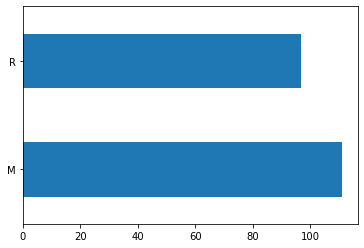

In [8]:
df[60].value_counts().plot(kind='barh')

Como no hay mucha diferencia entre ambas clases, entonces no es necesario *rebalancear* de alguna manera el dataset.

Ahora, veamos si existe multicolinealidad.

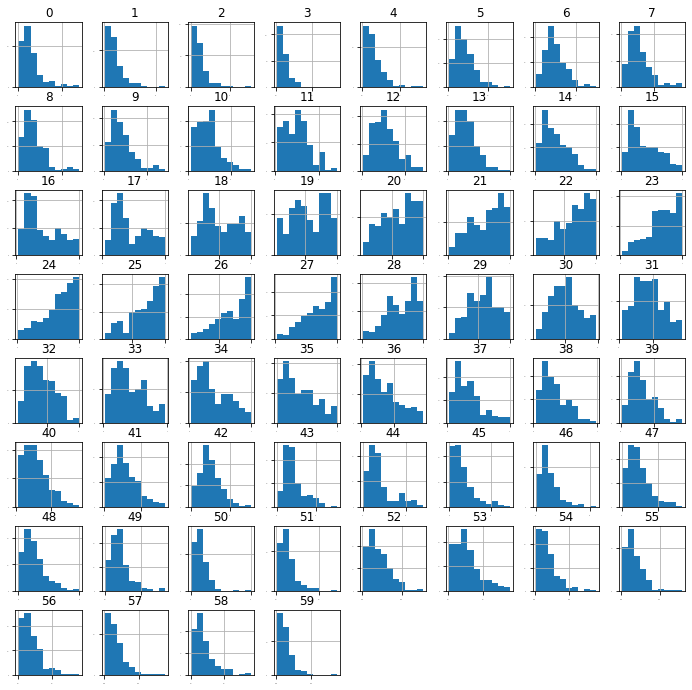

In [60]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

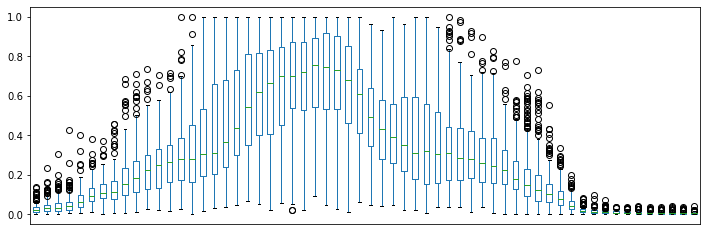

In [62]:
df.plot.box(figsize=(12,4), xticks=[])
pass

Aunque los metadatos dicen que todos los predictores van de $0$ a $1$, todavía encontramos que hay varios de ellos que tienen valores relativamente menores en comparación con la mayoría. También encontramos que no hay ningún valor alto más grande que el valor $1$.

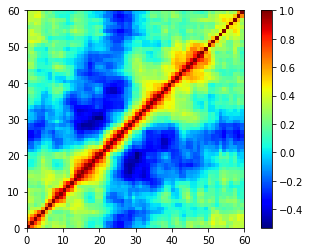

In [9]:
heatmap = plt.pcolor(df.corr(), cmap='jet')
plt.colorbar(heatmap)
plt.gca().set_aspect('equal')

La cual nos indica que hay alguna estructura en el órden de los atributos: el color rojo alrededor de la diagonal sugiere que los atributos que están uno al lado del otro están más correlacionados entre sí (es decir, cada variable tiene una gran correlación positiva con sus vecinos), las manchas azules sugieren alguna correlación negativa moderada entre los atributos que están más alejados unos de otros.

Esto tiene sentido si el orden de los atributos se refiere al ángulo de los sensores para el chirrido del sonar.

## Preprocesamiento de los datos

In [10]:
X = df.drop(60, axis=1) # Seleccionamos las primeras 59 columnas.
y = df[60] # Seleccionamos la columna 60.

La gráfica de cajas nos sugiere que debemos estandarizar los datos de entrada.

La clase **StandardScaler** estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [69]:
ss = StandardScaler()
df_transformed = ss.fit_transform(X)

In [70]:
scaled_X = pd.DataFrame(df_transformed, columns=X.columns)

In [72]:
scaled_X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


La variable de salida (la columna $60$) es un valor de string (M y R). Debemos convertirlos en valores enteros entre $0$ y $1$. Esto lo podemos lograr usando la clase **LabelEncoder**, pues ésta modelará la codificación requerida usando todo el conjunto de datos a través de la función fit(), luego aplicará la codificación para crear una nueva variable de salida usando la función transform().

In [13]:
encoder = LabelEncoder()
encoder.fit(y)
 
encoded_Y = encoder.transform(y)

donde obtenemos que $1 \rightarrow R$ y $0 \rightarrow M$.

## Modelo

In [73]:
# Dividimos el conjunto de datos en prueba y entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(scaled_X, encoded_Y, test_size=0.2)

Creamos el modelo y lo entrenamos.

In [74]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

## Predicciones y resultados

Realizamos predicciones y visualizamos los resultados de éstas.

In [75]:
y_pred = logistic_regression.predict(X_test)

In [76]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dfp

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


Visualizamos la matriz de confusión.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

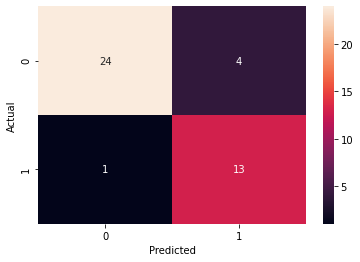

In [77]:
import seaborn as sn

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

y observamos la precisión de nuestro modelo.

In [78]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8809523809523809
Precision: 0.7647058823529411
Recall: 0.9285714285714286


In [79]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 0.12
Mean squared error: 0.12
Root Mean Squared Error: 0.35
Variance score: 0.46


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.76      0.93      0.84        14

    accuracy                           0.88        42
   macro avg       0.86      0.89      0.87        42
weighted avg       0.89      0.88      0.88        42

